## qsoabsfind example notebook

Below I show a few examples to run `qsoabsfind` explore its output.

In [1]:
# imports
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

## Running qsoabsfind as `bash` script

### details of input file

In [2]:
# exploring ..data/qso_test.fits file
hdul = fits.open(f'../data/qso_test.fits')


I have already run `qsoabsfind` on `../data/qso_test.fits` and saved the results as `../data/MgII_cat.fits`. In case you want to run, please do it by changing the `--output`

### Example run

In [3]:
# ! export absorber='MgII'
# !qsoabsfind  --input-fits-file ../data/qso_test.fits \
#              --output ../data/${absorber}_cat.fits\
#              --absorber ${absorber} \
#              --n-tasks 4 --ncpus 4 \
#              --headers AUTHOR=ABHIJEET SURVEY=SDSS 

### Exploring output

Text(0.5, 0, 'MgII redshift')

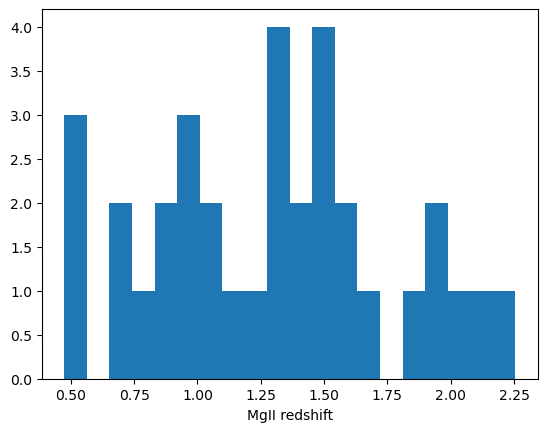

In [4]:
mgii_tab = Table.read(f'../data/MgII_cat.fits', hdu=1)
zabs = mgii_tab["Z_ABS"].data
plt.hist(zabs, bins=20)
plt.xlabel('MgII redshift')

Text(0.5, 0, '$EW_{\\rm MgII}\\, [\\AA]$')

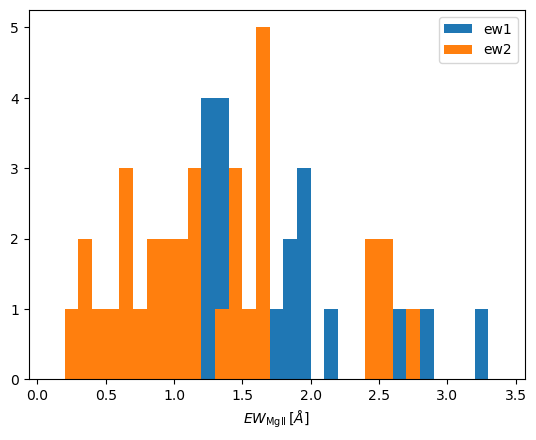

In [5]:
ew1 = mgii_tab["MGII_2796_EW"].data
ew2 = mgii_tab["MGII_2803_EW"].data
bins = np.arange(0.1, 3.5, 0.1)
plt.hist(ew1, bins=bins, label='ew1')
plt.hist(ew2, bins=bins, label = 'ew2')
plt.legend()
plt.xlabel(r'$EW_{\rm MgII}\, [\AA]$')

### Plotting spectra

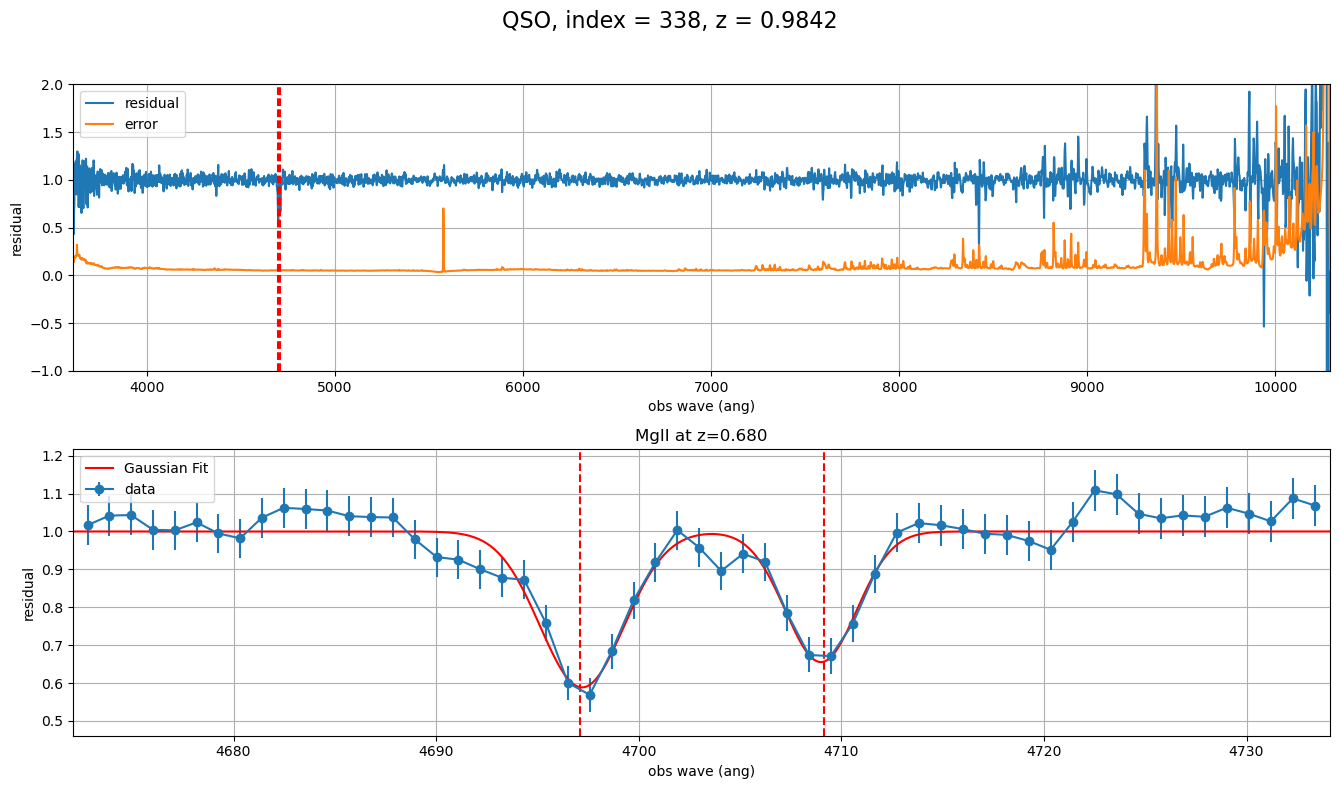

In [6]:
from qsoabsfind.utils import plot_absorber
from qsoabsfind.spec import QSOSpecRead
import numpy as np

# select a random spectra from MgII_cat.fits
index = np.random.choice(mgii_tab["INDEX_SPEC"].data)
spectra = QSOSpecRead(f'../data/qso_test.fits', index)

# select corresponding zabs table
zabs = mgii_tab[mgii_tab["INDEX_SPEC"].data==index]
plot_absorber(spectra, 'MgII', zabs, show_error=True, xlabel='obs wave (ang)', \
              ylabel='residual', title=f'QSO, index = {index}, z = {spectra.metadata["Z_QSO"]:.4f}', plot_filename=None)

### Using qsoabsfind internally as module

In [7]:
# if want to run qsoabsfind on one spectrum
from qsoabsfind.absfinder import read_single_spectrum_and_find_absorber
from qsoabsfind.constants import search_parameters
help(read_single_spectrum_and_find_absorber)

Help on function read_single_spectrum_and_find_absorber in module qsoabsfind.absfinder:

read_single_spectrum_and_find_absorber(fits_file, spec_index, absorber, **kwargs)
    This function retrieves a single QSO spectrum from a FITS file, processes the data to remove NaNs,
    and prepares the spectrum for absorber search within specified wavelength regions
    and runs the convolution based adaptive S/N method to detect absorbers in the spectrum.
    
    Args:
        fits_file (str): Path to the FITS file containing normalized QSO spectra.
                         The file must include extensions for FLUX, ERROR, WAVELENGTH
                         and METADATA which must contain keyword Z_QSO.
        spec_index (int): Index of the quasar spectrum to retrieve from the FITS file.
        absorber (str): Name of the absorber to search for (e.g., 'MgII', 'CIV').
        kwargs (dict): search parameters as described in qsoabsfind.constants()
    
    Returns:
        tuple: Contains li

In [8]:
read_single_spectrum_and_find_absorber(f'../data/qso_test.fits', 139, 'MgII', **search_parameters["MgII"])


Time taken to finish MgII detection for index = 139 is:  3.28 seconds


([139],
 [0.8884519361321443],
 [[0.4740964209304499,
   2796.32487972589,
   0.8171984695547682,
   0.43726190990801483,
   2803.545184617864,
   0.7353782718024258]],
 [[0.038144352843101186,
   0.08055460408603198,
   0.08309586886629468,
   0.039186752119984944,
   0.08018128046160167,
   0.08251236028550203]],
 [0.9711451530456543],
 [0.8060135841369629],
 [1.7771587371826172],
 [0.21239396929740906],
 [0.19476597011089325],
 [0.2881752550601959],
 [3.832930815406144e-05],
 [9.458690666812265],
 [9.73717026916531])

Text(0.5, 0, 'CIV redshift')

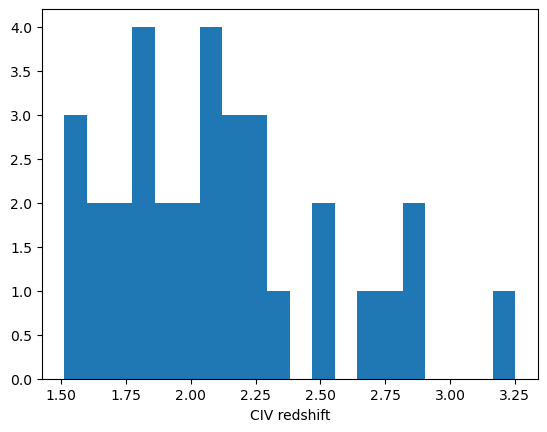

In [9]:
abs_tab = Table.read(f'../data/CIV_cat.fits', hdu=1)
zabs = abs_tab["Z_ABS"].data
plt.hist(zabs, bins=20)
plt.xlabel('CIV redshift')

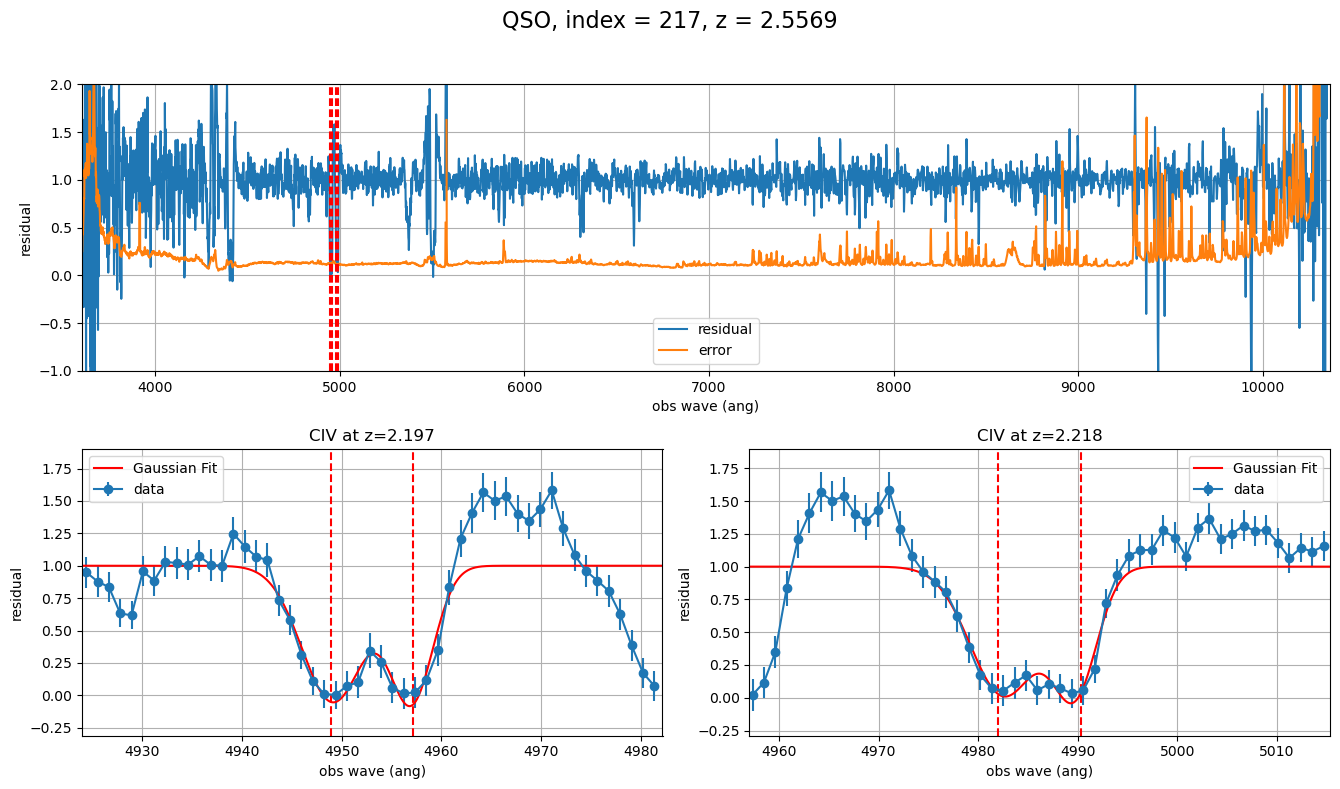

In [11]:
from qsoabsfind.utils import plot_absorber
from qsoabsfind.spec import QSOSpecRead

# select a random spectra from MgII_cat.fits
index = np.random.choice(abs_tab["INDEX_SPEC"].data)
spectra = QSOSpecRead(f'../data/qso_test.fits', index)

# select corresponding zabs table
zabs = abs_tab[abs_tab["INDEX_SPEC"].data==index]
plot_absorber(spectra, 'CIV', zabs, show_error=True, xlabel='obs wave (ang)', \
              ylabel='residual', title=f'QSO, index = {index}, z = {spectra.metadata["Z_QSO"]:.4f}', plot_filename=None)